In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load and preprocess the IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 200  # Cut off reviews after this many words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
# 2. Build the LSTM model
model = Sequential([
    Embedding(max_features, 128),  # Removed input_length parameter
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 3. Train the model
history = model.fit(X_train, y_train,
                   epochs=5,
                   batch_size=32,
                   validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7189 - loss: 0.5320 - val_accuracy: 0.8634 - val_loss: 0.3226
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8956 - loss: 0.2623 - val_accuracy: 0.8712 - val_loss: 0.3053
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9240 - loss: 0.2016 - val_accuracy: 0.8458 - val_loss: 0.3630
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9481 - loss: 0.1398 - val_accuracy: 0.8568 - val_loss: 0.3861
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9682 - loss: 0.0877 - val_accuracy: 0.8362 - val_loss: 0.4372


In [ ]:
# 4. Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


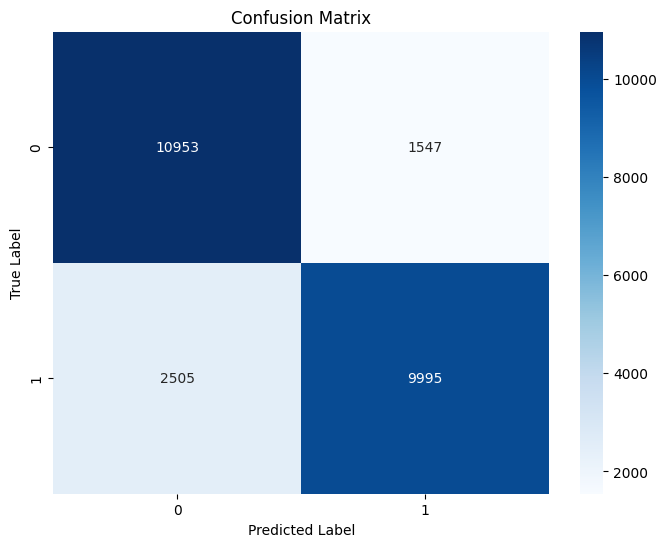


Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.88      0.84     12500
    Positive       0.87      0.80      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [ ]:
# 5. Visualize results
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(report)

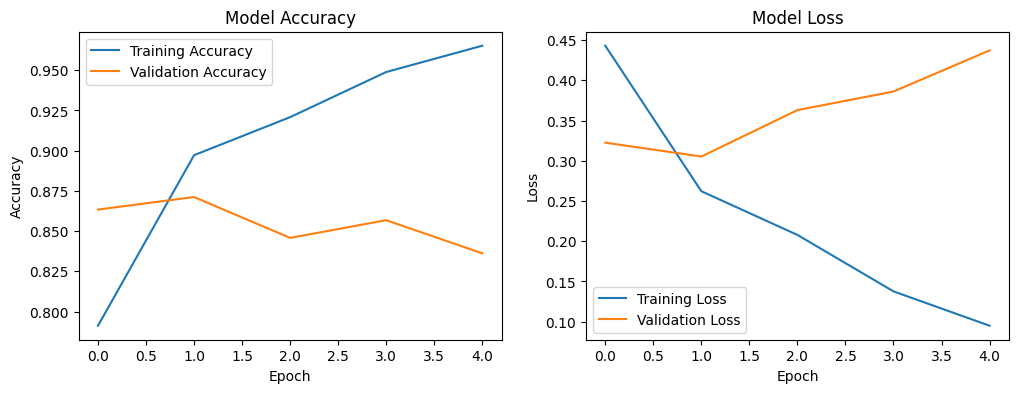

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()